<a href="https://colab.research.google.com/github/samuelflores/deep-learning-RNA-structure-prediction/blob/main/pyDCA_PRC_Sam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import math
from numpy import asarray
from numpy import save
from numpy import load

from sklearn.preprocessing import StandardScaler
import os
import tempfile


import matplotlib as mpl
import sklearn

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [2]:
from sklearn.metrics import PrecisionRecallDisplay

In [3]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot( recall, precision, label=name, linewidth=2, **kwargs)
    plt.ylabel('Precision = TP/(TP+FP)')
    plt.xlabel('Recall = TP/(TP + FN)')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

In [4]:
df = pd.read_csv('./drive/MyDrive/deep-learning-RNA-structure-prediction/Floyd_Scripts_and_Figs/labeledfrequenciesanddca_april_26.csv')

FileNotFoundError: [Errno 2] No such file or directory: './drive/MyDrive/deep-learning-RNA-structure-prediction/Floyd_Scripts_and_Figs/labeledfrequenciesanddca_april_26.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df['bond_type'].values[df['bond_type']>0] = 1

In [ ]:
set(df.bond_type)

In [ ]:
scaler = preprocessing.MinMaxScaler()
dca = df[['dca_val']]

In [ ]:
y = scaler.fit_transform(dca)

In [ ]:
df

In [ ]:
df.nlargest(n=10, columns=["dca_val"]) #.bond_type.values()


In [ ]:
topN = 10
print(sum(df.nlargest(n=topN, columns=["dca_val"]).bond_type.values)/topN)

In [ ]:
mpl.rcParams['figure.figsize'] = (15, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

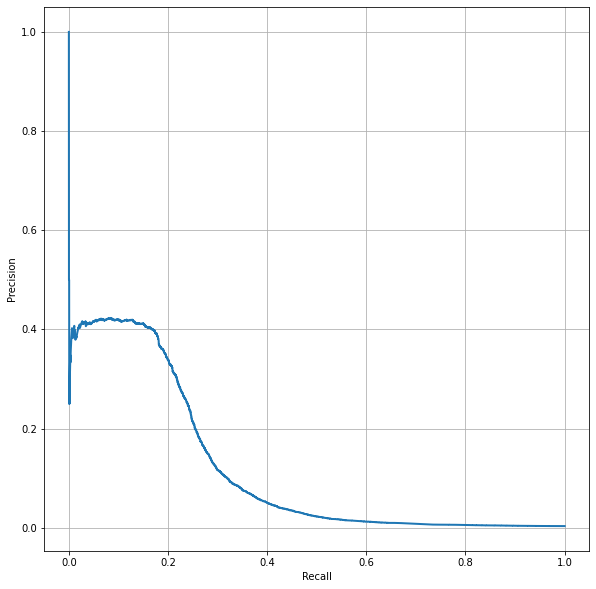

In [20]:
plot_prc('pyDCA', df.bond_type, y)

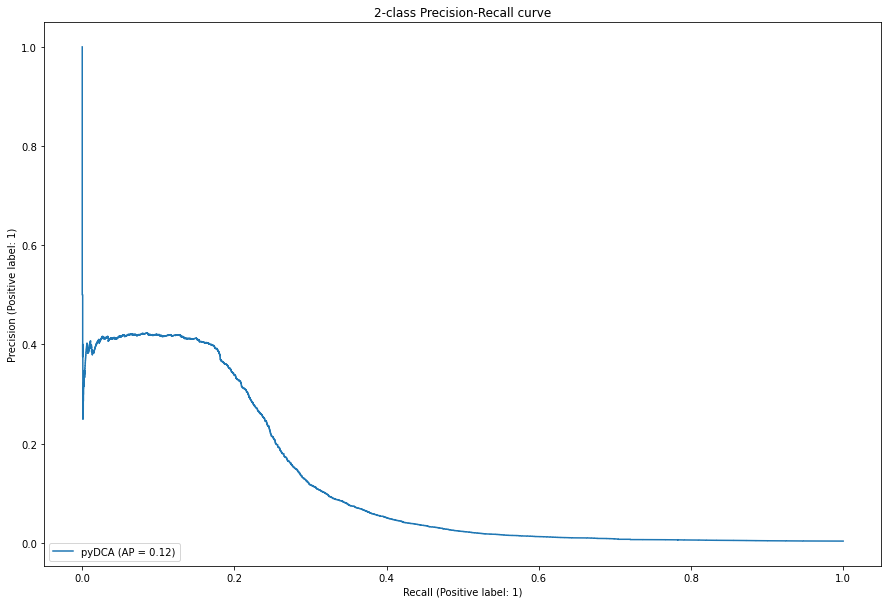

In [ ]:
display = PrecisionRecallDisplay.from_predictions(df.bond_type, y, name="pyDCA")
_ = display.ax_.set_title("2-class Precision-Recall curve")